In [1]:
pip install geopandas pandas numpy matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 1. 加载数据
# 公园 shapefile
parks = gpd.read_file("/content/drive/MyDrive/Capstone/IMPORTANT_DATA/filtered_park_df.geojson")
# 人口点分布数据（GeoDataFrame，包含 'population' 列）
population_points = gpd.read_file("/content/drive/MyDrive/Capstone/data/population data/filtered_elder_pop1106_index9%.shp")
# 距离矩阵 (CSV，行是人口点，列是公园，值是距离
OD_data= pd.read_csv("/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/ALL_Valid_OD_Instructions")


In [11]:
import pandas as pd

# 假设你的数据已经加载为 DataFrame df
# 将 walking_distance 转换为矩阵
distance_matrix = OD_data.pivot_table(
    index='origin_id',  # 行是人口点
    columns='destination_id',  # 列是公园
    values='walking_distance'  # 使用步行距离作为值
)

# 查看结果
distance_matrix

destination_id,32,34,56,57,70,129,169,170,174,197,...,9312,9367,9368,9369,9370,10340,11332,11333,13608,15321
origin_id,,,,,,,,,,,,,,,,,,,,,
19642,NaN,NaN,NaN,NaN,NaN,NaN,1788.0,1220.0,629.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1210.0,818.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19644,NaN,NaN,NaN,NaN,NaN,NaN,1773.0,1084.0,900.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19875,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,1441.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19876,NaN,NaN,NaN,NaN,NaN,NaN,1920.0,1352.0,536.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#nah--> inaccessible
distance_matrix.fillna(3000 + 1, inplace=True)
distance_matrix

destination_id,32,34,56,57,70,129,169,170,174,197,...,9312,9367,9368,9369,9370,10340,11332,11333,13608,15321
origin_id,,,,,,,,,,,,,,,,,,,,,
19642,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,1788.0,1220.0,629.0,3001.0,...,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0
19643,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,1210.0,818.0,3001.0,...,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0
19644,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,1773.0,1084.0,900.0,3001.0,...,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0
19875,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,2024.0,1441.0,3001.0,3001.0,...,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0
19876,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,1920.0,1352.0,536.0,3001.0,...,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36377,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,...,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0
36378,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,...,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0
36379,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,...,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0


In [21]:
OD_data

,origin_id,destination_id,distance_meters,population_weight,origin_loc,destination_loc,walking_distance,walking_duration,walking_instructions
0,23366,8103,994.562853,1,POINT (31.234871586477823 121.4598620928743),POINT (31.225910961002086 121.46364978111635),1197.0,15.966667,向东步行37米右转 -> 沿石门二路辅路向东南步行249米向左前方行走 -> 沿石门二路步行...
1,23366,15321,2654.862695,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22496410253977 121.43880913080065),2331.0,31.083333,沿新闸路向西南步行2159米右转 -> 沿万航渡路向西步行119米左转 -> 向南步行53米...
2,23367,32,2692.516726,1,POINT (31.234871586477823 121.46076040815845),POINT (31.24568500093139 121.48221228970229),2847.0,37.966667,向西南步行6米右转 -> 沿石门二路步行96米向右前方行走 -> 沿新闸路向东北步行789米...
3,23367,56,636.286360,1,POINT (31.234871586477823 121.46076040815845),POINT (31.23404893186907 121.46856854803025),1058.0,14.100000,沿石门二路向南步行239米左转 -> 沿北京西路向东步行685米右转 -> 沿新昌路步行13...
4,23367,57,1883.073903,1,POINT (31.234871586477823 121.46076040815845),POINT (31.218958730579963 121.4644941435671),1893.0,25.233333,沿石门二路向南步行248米向右前方行走 -> 沿石门二路向南步行214米直行 -> 沿石门一...
...,...,...,...,...,...,...,...,...,...
22666,23366,5234,1946.850434,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22054466419129 121.46640111292464),2268.0,30.233333,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
22667,23366,5651,2919.650191,1,POINT (31.234871586477823 121.4598620928743),POINT (31.218529661236683 121.44155435756056),2884.0,38.450000,沿新闸路向西南步行265米左转 -> 沿泰兴路向南步行270米右转 -> 沿北京西路向西南步...
22668,23366,6037,1795.776417,1,POINT (31.234871586477823 121.4598620928743),POINT (31.224994962160345 121.47302302161059),2053.0,27.366667,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
22669,23366,6435,882.983523,1,POINT (31.234871586477823 121.4598620928743),POINT (31.235872944920363 121.46913939765386),1103.0,14.700000,向东步行37米右转 -> 沿石门二路辅路向南步行242米左转 -> 沿北京西路步行813米左...


In [35]:
parks

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,geometry
0,56,39763744,7202,park,人民公园,0.013504,9.854620e-06,"MULTIPOLYGON (((121.47083 31.23446, 121.47125 ..."
1,57,39961770,7202,park,复兴公园,0.011324,6.920550e-06,"MULTIPOLYGON (((121.46457 31.22042, 121.46464 ..."
2,129,50258395,7202,park,大观园绿地,0.004629,9.350000e-07,"MULTIPOLYGON (((121.46866 31.23965, 121.46744 ..."
3,246,58413664,7202,park,None,0.004009,4.514200e-07,"MULTIPOLYGON (((121.47952 31.19812, 121.47822 ..."
4,247,58413720,7202,park,None,0.005192,9.922400e-07,"MULTIPOLYGON (((121.48059 31.19819, 121.48047 ..."
...,...,...,...,...,...,...,...,...
105,5513,477138725,7202,park,None,0.001543,1.101900e-07,"MULTIPOLYGON (((121.44744 31.21099, 121.44719 ..."
106,5514,477138726,7202,park,None,0.001404,1.157900e-07,"MULTIPOLYGON (((121.44357 31.21067, 121.44327 ..."
107,6469,571607270,7202,park,None,0.002431,2.940200e-07,"MULTIPOLYGON (((121.44621 31.19872, 121.4466 3..."
108,9370,870546902,7202,park,None,0.008064,1.239510e-06,"MULTIPOLYGON (((121.45771 31.17676, 121.45772 ..."


In [38]:
population_points

,id,population,elder_rati,geometry
0,19642,80.844990,0.100967,POINT (13518650 3664926.845)
1,19643,83.608226,0.100967,POINT (13518750 3664926.845)
2,19644,69.003618,0.100967,POINT (13518850 3664926.845)
3,19875,78.576787,0.100967,POINT (13518450 3664809.878)
4,19876,76.828783,0.100967,POINT (13518550 3664809.878)
...,...,...,...,...
2021,36377,64.789033,0.099534,POINT (13521850 3657676.968)
2022,36378,60.187111,0.099534,POINT (13521950 3657676.968)
2023,36379,58.169425,0.099534,POINT (13522050 3657676.968)
2024,36380,68.189320,0.099534,POINT (13522150 3657676.968)


In [45]:
# # 将 population_points 的 'id' 列设置为索引
# population_points.set_index('id', inplace=True)

# # 确保索引类型与其他数据一致（例如 distance_matrix 的行索引）
population_points.index = population_points.index.astype(int)
population_points

,population,elder_rati,geometry
id,,,
19642,80.844990,0.100967,POINT (13518650 3664926.845)
19643,83.608226,0.100967,POINT (13518750 3664926.845)
19644,69.003618,0.100967,POINT (13518850 3664926.845)
19875,78.576787,0.100967,POINT (13518450 3664809.878)
19876,76.828783,0.100967,POINT (13518550 3664809.878)
...,...,...,...
36377,64.789033,0.099534,POINT (13521850 3657676.968)
36378,60.187111,0.099534,POINT (13521950 3657676.968)
36379,58.169425,0.099534,POINT (13522050 3657676.968)


In [26]:
# 检查 population_points 的 id 是否都在 distance_matrix 的行索引中
population_ids = population_points['id'].astype(str)  # population_points 的 ID
distance_ids = distance_matrix.index.astype(str)      # distance_matrix 的行索引

# 找到不匹配的 ID
missing_ids = set(population_ids) - set(distance_ids)
print(f"Missing IDs (in population_points but not in distance_matrix): {missing_ids}")

# 保留出现在 distance_matrix 中的 population_points
population_points = population_points[population_points['id'].astype(str).isin(distance_ids)]

# 检查结果
print(f"Remaining population points: {len(population_points)}")


Missing IDs (in population_points but not in distance_matrix): {'25756', '25476', '35597', '25488', '35055'}
Remaining population points: 2021


Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'numpy.int64'>
Type of population_points index: <class 'numpy.int64'>
Type of in_range index: <class 'nump

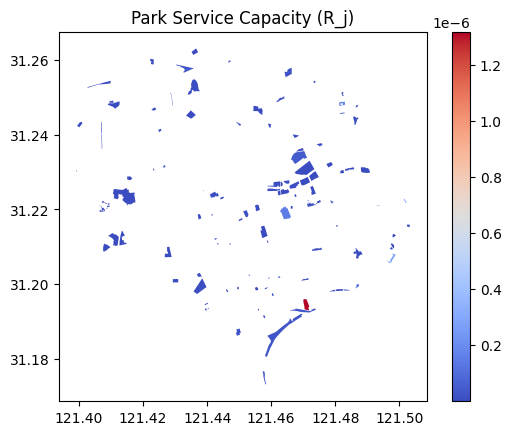

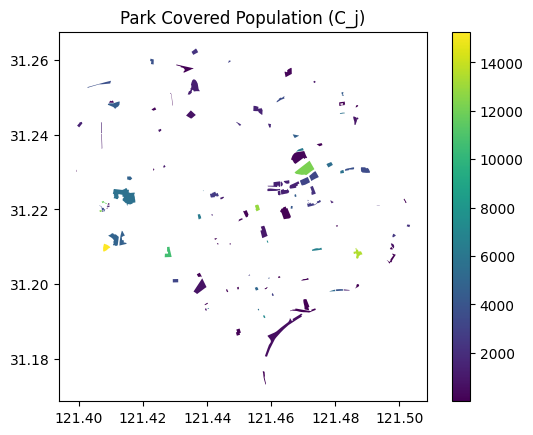

In [47]:


# 2. 参数设置
catchment_radius = 3000  # 捕获半径，单位米
distance_decay = lambda d, d0: max(0, 1 - d / d0)  # 距离权重函数

# 3. 计算服务能力 R_j
def calculate_service_capacity(parks, population_points, distance_matrix, catchment_radius):
    service_capacity = []
    for park_idx, park in parks.iterrows():
        distances_to_park = distance_matrix.iloc[:, park_idx]
        # 筛选在捕获范围内的点
        in_range = distances_to_park[distances_to_park <= catchment_radius]
        # 计算权重
        # print("Type of population_points index:", type(population_points.index[0]))
        # print("Type of in_range index:", type(in_range.index[0]))
        weights = in_range.apply(distance_decay, d0=catchment_radius)
        # 加权人口总数
        total_population = (population_points.loc[in_range.index, 'population'] * weights).sum()
        # 计算服务能力
        R_j = park['Shape_Area'] / total_population if total_population > 0 else np.nan
        service_capacity.append(R_j)
    parks['R_j'] = service_capacity
    return parks

parks = calculate_service_capacity(parks, population_points, distance_matrix, catchment_radius)

# 4. 计算覆盖人口 C_j
def calculate_population_coverage(parks, population_points, distance_matrix, catchment_radius):
    coverage = []
    for park_idx, park in parks.iterrows():
        distances_to_park = distance_matrix.iloc[:, park_idx]
        # 筛选在捕获范围内的点
        in_range = distances_to_park[distances_to_park <= catchment_radius]
        # 计算权重
        weights = in_range.apply(distance_decay, d0=catchment_radius)
        # 计算覆盖人口
        covered_population = (population_points.loc[in_range.index, 'population'] * weights).sum()
        coverage.append(covered_population)
    parks['C_j'] = coverage
    return parks

parks = calculate_population_coverage(parks, population_points, distance_matrix, catchment_radius)

# 5. 可视化结果
# 可视化服务能力 R_j
parks.plot(column='R_j', cmap='coolwarm', legend=True)
plt.title('Park Service Capacity (R_j)')
plt.show()

# 可视化覆盖人口 C_j
parks.plot(column='C_j', cmap='viridis', legend=True)
plt.title('Park Covered Population (C_j)')
plt.show()

# 6. 保存结果
#parks.to_file("park_accessibility_analysis.shp")


In [48]:
parks

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,geometry,R_j,C_j
0,56,39763744,7202,park,人民公园,0.013504,9.854620e-06,"MULTIPOLYGON (((121.47083 31.23446, 121.47125 ...",4.965937e-08,198.444303
1,57,39961770,7202,park,复兴公园,0.011324,6.920550e-06,"MULTIPOLYGON (((121.46457 31.22042, 121.46464 ...",1.482014e-07,46.696943
2,129,50258395,7202,park,大观园绿地,0.004629,9.350000e-07,"MULTIPOLYGON (((121.46866 31.23965, 121.46744 ...",2.005232e-10,4662.802711
3,246,58413664,7202,park,None,0.004009,4.514200e-07,"MULTIPOLYGON (((121.47952 31.19812, 121.47822 ...",8.537354e-11,5287.586959
4,247,58413720,7202,park,None,0.005192,9.922400e-07,"MULTIPOLYGON (((121.48059 31.19819, 121.48047 ...",2.469321e-10,4018.269810
...,...,...,...,...,...,...,...,...,...,...
105,5513,477138725,7202,park,None,0.001543,1.101900e-07,"MULTIPOLYGON (((121.44744 31.21099, 121.44719 ...",3.224447e-10,341.733049
106,5514,477138726,7202,park,None,0.001404,1.157900e-07,"MULTIPOLYGON (((121.44357 31.21067, 121.44327 ...",3.964175e-10,292.091011
107,6469,571607270,7202,park,None,0.002431,2.940200e-07,"MULTIPOLYGON (((121.44621 31.19872, 121.4466 3...",2.200157e-09,133.635944
108,9370,870546902,7202,park,None,0.008064,1.239510e-06,"MULTIPOLYGON (((121.45771 31.17676, 121.45772 ...",7.526439e-09,164.687448


In [49]:
parks.to_file("/content/drive/MyDrive/Capstone/IMPORTANT_DATA/park_accessibility_analysis.shp")